In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [78]:
df = pd.read_csv('savingprobs2.csv', names = ['t','winner'])
drop = df.loc[df['t'] == 'game'].index
df = df.drop(drop)
df = df.drop('t', axis = 1)
new_i = np.arange(df.shape[0])
df = df.set_index(new_i)

df

,winner
0,-1
1,1
2,1
3,1
4,1
...,...
4995,1
4996,0
4997,0
4998,0


Text(0.5, 0, 'step over 100 games')

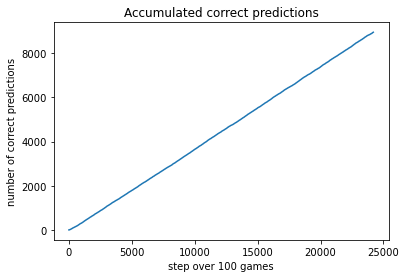

In [79]:
df2 = pd.read_csv('check2.csv', names = ['t','action'])
drop = df2.loc[df2['t'] == 'game'].index
df2 = df2.drop(drop)
df2 = df2.drop('t', axis = 1)
new_i = np.arange(df2.shape[0])
df2 = df2.set_index(new_i)
# df2 = df2.drop('t', axis = 1)

def accum_me(df):
    cumsum = 0
    all_sum = []

    for i in range(df.shape[0]):
        # print(df['winner'][i])
        if df['action'][i] == 'True':
            cumsum +=1
        all_sum.append(cumsum)

    df['accumulated_sum'] = all_sum
    return df

df2_accum = accum_me(df2)


sns.lineplot(x=df2_accum.index, y=df2_accum['accumulated_sum'])
plt.title('Accumulated correct predictions')
plt.ylabel('number of correct predictions')
plt.xlabel('step over 100 games')

In [86]:
df3 = pd.read_csv('om2.csv', names = ['t','action','p'])
# df3.loc[df3['t'] == 'next opp move   '].shape
# df3.loc[df3['action'] == 'Action.KICK']
# df.loc[df['t'] == 'new game']
# df3 = df3.drop('t', axis = 1)
# df3 = df3.fillna(0)
df3

,t,action,p
0,new game,start,NaN
1,last move,NaN,NaN
2,next opp move,NaN,-1.000000
3,last move,"(<Action.MOVE: 2>, -1, 0)",NaN
4,next opp move,NaN,-1.000000
...,...,...,...
50883,next opp move,"(<Action.MOVE: 2>, 1, 0)",1.000000
50884,last move,"(<Action.MOVE: 2>, 0, -1)",NaN
50885,next opp move,"(<Action.MOVE: 2>, -1, 0)",0.659919
50886,last move,"(<Action.MOVE: 2>, -1, 0)",NaN


In [87]:
df2['action'].isin(df3['action']).value_counts()

False    24192
Name: action, dtype: int64

In [88]:
def count_steps(df):
    first_1000 = df.iloc[:1000]
    f1000_wins = first_1000.loc[first_1000['winner'] == 1].sum()

    second_1000 = df.iloc[1000:2000]
    s1000_wins = second_1000.loc[second_1000['winner'] == 1].sum()

    third_1000 = df.iloc[2000:3000]
    t1000_wins = third_1000.loc[third_1000['winner'] == 1].sum()

    fourth_1000 = df.iloc[3000:4000]
    fou1000_wins = fourth_1000.loc[fourth_1000['winner'] == 1].sum()

    fifth_1000 = df.iloc[4000:5000]
    fif1000_wins = fifth_1000.loc[fifth_1000['winner'] == 1].sum()

    wins = np.array([f1000_wins,s1000_wins, t1000_wins,fou1000_wins,fif1000_wins])
    headings = np.array(['first 1000 games', 'next 1000 games' , 'next 1000 games' , 'next 1000 games' , 'next 1000 games'])

    first_1000 = df.iloc[:1000]
    f1000_wins = first_1000.loc[first_1000['winner'] == 0].count()

    second_1000 = df.iloc[1000:2000]
    s1000_wins = second_1000.loc[second_1000['winner'] == 0].count()

    third_1000 = df.iloc[2000:3000]
    t1000_wins = third_1000.loc[third_1000['winner'] == 0].count()

    fourth_1000 = df.iloc[3000:4000]
    fou1000_wins = fourth_1000.loc[fourth_1000['winner'] == 0].count()

    fifth_1000 = df.iloc[4000:5000]
    fif1000_wins = fifth_1000.loc[fifth_1000['winner'] == 0].count()

    wins2 = np.array([f1000_wins,s1000_wins, t1000_wins,fou1000_wins,fif1000_wins])


    winnings = pd.DataFrame()
    winnings['Heading'] = headings 
    winnings['my wins '] = wins
    winnings['opponent wins '] = wins2

    return winnings

In [89]:
def accum_me(df):
    cumsum = 0
    all_sum = []

    for i in range(df.shape[0]):
        # print(df['winner'][i])
        if df['winner'][i] == 1:
            cumsum +=1
        all_sum.append(cumsum)

    df['accumulated_sum'] = all_sum
    return df

def accum_opp(df):
    cumsum = 0
    all_sum = []

    for i in range(df.shape[0]):
        # print(df['winner'][i])
        if df['winner'][i] == 0:
            cumsum +=1
        all_sum.append(cumsum)

    df['accumulated_sum_opp'] = all_sum
    return df

In [90]:
count_steps(df)

ValueError: Wrong number of items passed 3, placement implies 1

Text(0.5, 0, 'game')

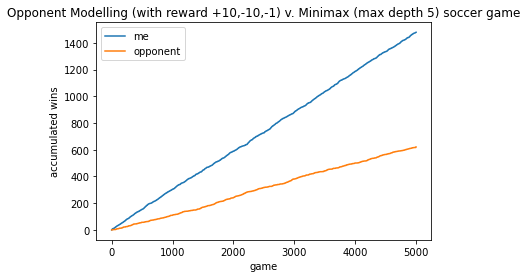

In [92]:
df_accum = accum_me(df)
df_accum = accum_opp(df_accum)


sns.lineplot(x=df_accum.index, y=df_accum['accumulated_sum'])
sns.lineplot(x=df_accum.index, y=df_accum['accumulated_sum_opp'])

plt.legend(['me','opponent'])

plt.title('Opponent Modelling (with reward +10,-10,-1) v. Minimax (max depth 5) soccer game')
plt.ylabel('accumulated wins')
plt.xlabel('game')

In [91]:
df1 = df.drop(['accumulated_sum' , 'accumulated_sum_opp'],axis = 1)
df1 = count_steps(df1)
df1['my wins ']/1000

0    0.303
1    0.287
2    0.290
3    0.307
4    0.293
Name: my wins , dtype: float64